<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   maths        120 non-null    int64 
 1   sinhala      120 non-null    int64 
 2   english      120 non-null    int64 
 3   history      120 non-null    int64 
 4   class-label  120 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.8+ KB
Details of the Train DataFrame:
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   maths    30 non-null     int64
 1   sinhala  30 non-null     int64
 2   english  30 non-null     int64
 3   history  30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB
Details of the Test DataFrame:
None


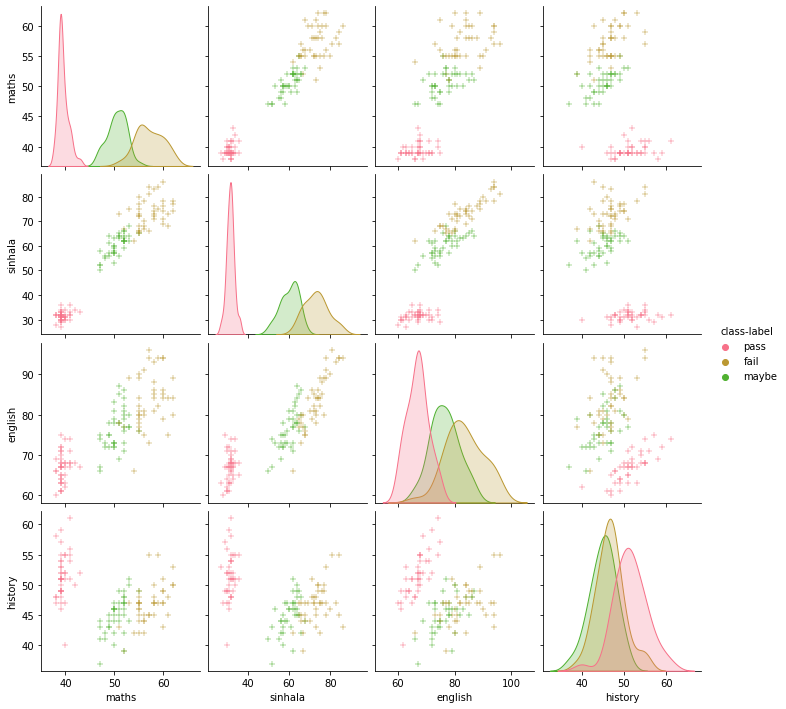

X shape: (120, 4) | y shape: (120,) 
Current Accuracy = 1.0
------CLASSIFICATION RESLUTS START------
fail
pass
fail
maybe
pass
pass
pass
maybe
fail
fail
fail
maybe
pass
maybe
fail
fail
maybe
pass
maybe
maybe
pass
maybe
fail
maybe
maybe
fail
pass
fail
maybe
pass
------CLASSIFICATION RESLUTS END------


In [18]:
# IMPORTING LIBRARIES ***********************************************************
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette('husl')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

# Load The Training and Test Data
train_df = pd.read_csv('student_marks_train.csv')
result = train_df.info()
print("Details of the Train DataFrame:")
print(result)

test_df = pd.read_csv('student_marks_test.csv')
result = test_df.info()
print("Details of the Test DataFrame:")
print(result)

# EXPLORE the data to see the distributions ***************************************.
sns.pairplot(train_df, hue='class-label', markers='+')
plt.show()

# PRE-PROCESS the data to see if you can improve the final classification**********


# SPLIT taining data to test ML model *********************************************
# Drop the column that contains the class labels
X = train_df.drop(['class-label'], axis=1)
y = train_df['class-label']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Split: 50% for training. 50% for testing
# We have to split the given training data to test since the test data given does not have class-labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)
            
# BUILD and TRAIN ML model *******************************************************
# Support vector machine algorithm for ML
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)
# Model evaluation
# Check predictions of the test dataset that we created
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print("Current Accuracy =", accuracy_score(y_test, predictions))

# TEST the class labels for the given Test set ***********************************
# Now Predict the given test set using the ML model that we created
test_labels = (svn.predict(test_df))
print("------CLASSIFICATION RESLUTS START------")
for i in range(len(test_labels)):
  print(test_labels[i])
print("------CLASSIFICATION RESLUTS END------")

# You can cut and paste the output to the answer box and click Check to see 
# how good your ML model is working on the new testset where you do not know the class-lables
# Try to see if you can get it 100% (1.0)